In [1]:
#lets import in the libraries
import pandas as pd
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns; sns.set()
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols    
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [2]:
# reading the dataset
df_baseball=pd.read_csv("Baseball.csv")

In [3]:
#the columns of the dataset
df_baseball.columns

Index(['Name', 'Team', 'Position', 'Height_inches', 'Weight_pounds', 'Age'], dtype='object')

In [6]:
df_baseball['Position'].unique()

array(['Catcher', 'First_Baseman', 'Second_Baseman', 'Shortstop',
       'Third_Baseman', 'Outfielder', 'Designated_Hitter',
       'Starting_Pitcher', 'Relief_Pitcher'], dtype=object)

In [250]:
#this is what it looks like
df_baseball.head()

,Name,Team,Position,Height_inches,Weight_pounds,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [251]:
#information about the first row
df_baseball.loc[0,:]

Name             Adam_Donachie
Team                       BAL
Position               Catcher
Height_inches               74
Weight_pounds              180
Age                      22.99
Name: 0, dtype: object

In [252]:
#calcuating summary statistics for height, weight, and age
df_baseball.describe()

,Height_inches,Weight_pounds,Age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


In [253]:
#df_baseball.describe(include='all')

,Name,Team,Position,Height_inches,Weight_pounds,Age
count,1034,1034,1034,1034.000000,1033.000000,1034.000000
unique,1032,30,9,NaN,NaN,NaN
top,Tony_Pe?a,NYM,Relief_Pitcher,NaN,NaN,NaN
freq,2,38,315,NaN,NaN,NaN
mean,NaN,NaN,NaN,73.697292,201.689255,28.736712
std,NaN,NaN,NaN,2.305818,20.991491,4.320310
min,NaN,NaN,NaN,67.000000,150.000000,20.900000
25%,NaN,NaN,NaN,72.000000,187.000000,25.440000
50%,NaN,NaN,NaN,74.000000,200.000000,27.925000
75%,NaN,NaN,NaN,75.000000,215.000000,31.232500


# Calculating averages by group

In [254]:
#finding the average age by team
df_baseball[['Age', 'Team']].groupby('Team').mean()

,Age
Team,
ANA,28.808857
ARZ,27.835000
ATL,28.325676
BAL,29.062286
BOS,29.783889
CHC,28.419167
CIN,29.853056
CLE,28.360286
COL,28.056000


In [255]:
#finding the within team variation for height, weight, and age
df_baseball.groupby('Team').std()

,Height_inches,Weight_pounds,Age
Team,,,
ANA,2.448804,22.679832,4.260710
ARZ,2.625425,24.538599,4.365166
ATL,2.088507,20.908028,4.332010
BAL,2.501428,17.209681,4.161866
BOS,2.126178,19.079533,5.066779
CHC,2.192882,20.237381,3.374257
CIN,2.414243,16.237109,4.845560
CLE,1.960964,24.970504,4.602506
COL,2.633973,19.352893,3.638688


In [256]:
#making column names accessible without mentioning the dataframe
for col in df_baseball.columns:
    globals()[col] = df_baseball[col]

# Comparing distributions and means for height and weight of players

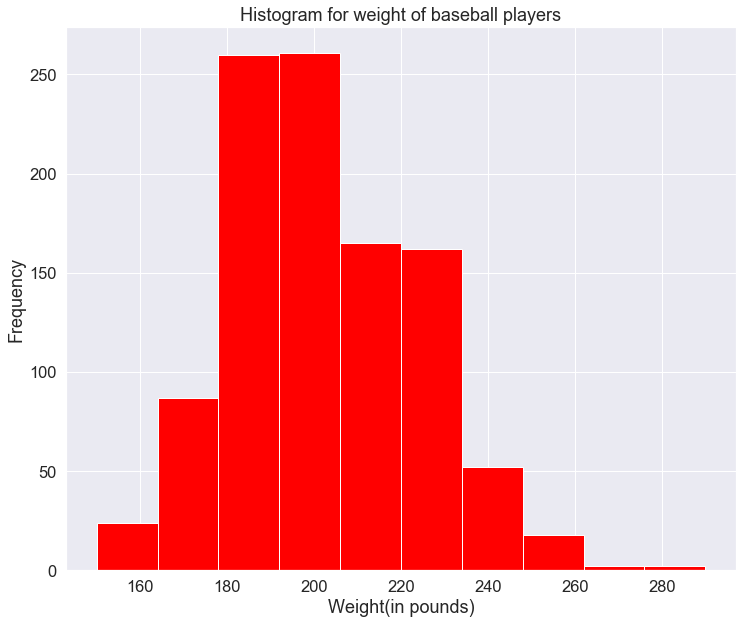

In [262]:
#Histogram of height of players
#Distribution of height of payers
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt.hist(Weight_pounds,bins=10,color='red')
plt.title('Histogram for weight of baseball players')
plt.ylabel('Frequency')
plt.xlabel('Weight(in pounds)')
plt.show()

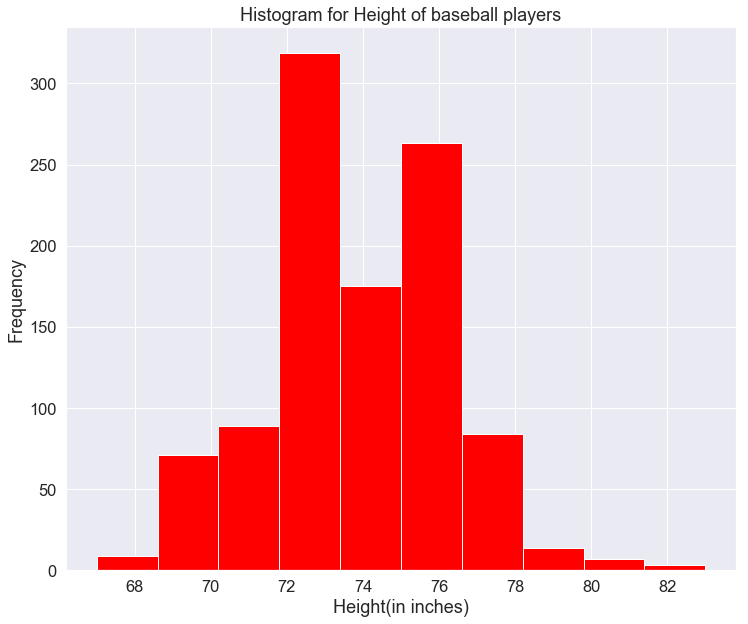

<Figure size 720x432 with 0 Axes>

In [263]:
#Histogram of weight of players
#Distribution of weight of payers
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt.hist(Height_inches,bins=10,color='red')
plt.title('Histogram for Height of baseball players')
plt.ylabel('Frequency')
plt.xlabel('Height(in inches)')
plt.figure(figsize=(10,6))
plt.show()

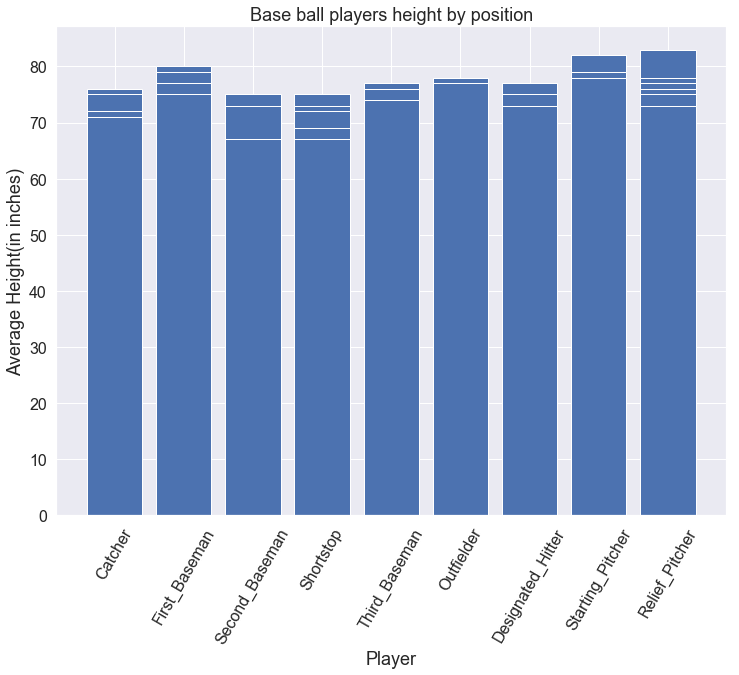

In [265]:
#Bar graph for height by pler's position
#Comparing the average height by  player's position
plt.figure(figsize=(12,9))
plt.bar(Position, Height_inches, align='center')
plt.ylabel('Average Height(in inches)')
plt.xlabel('Player')
plt.title('Base ball players height by position')
plt.xticks(rotation=60, size=16)
plt.yticks(size=16)
plt.show()


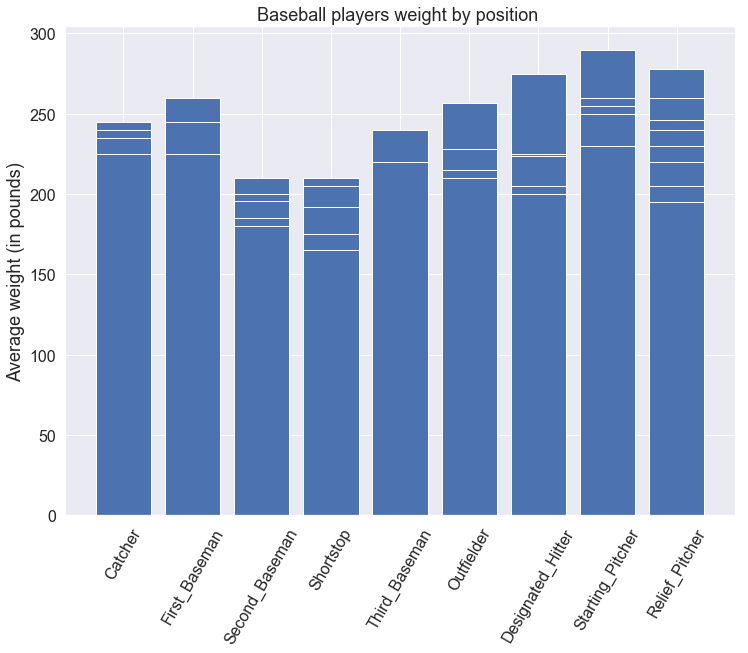

<Figure size 720x432 with 0 Axes>

In [266]:
#Bar graph for weight by player's position
#Comparing the average weight by  player's position
plt.figure(figsize=(12,9))
plt.bar(Position, Weight_pounds, align='center')
plt.ylabel('Average weight (in pounds)',fontsize=18)
plt.title('Baseball players weight by position ',fontsize=18)
plt.xticks(rotation=60, size=16)
plt.yticks( size=16)
plt.figure(figsize=(10,6))
plt.show()

# Exploring relationship between Height, Weight, and position  

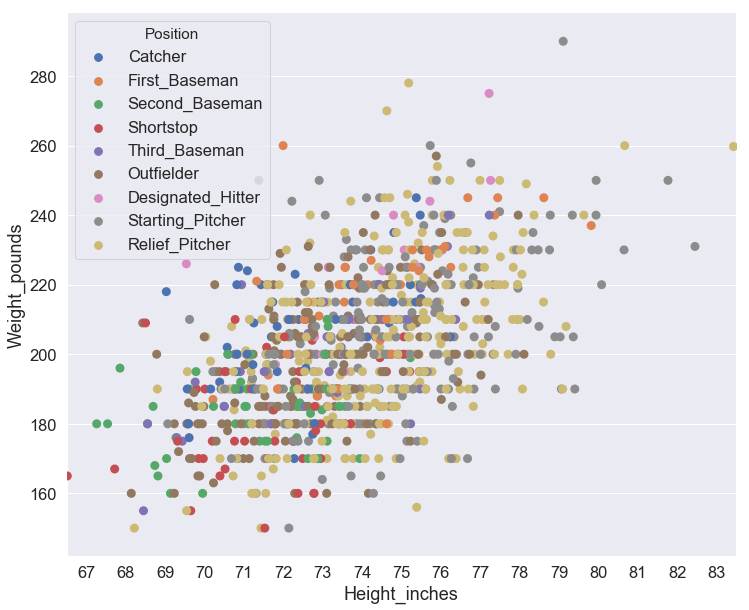

In [260]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1.5)
sns.stripplot(x="Height_inches", y="Weight_pounds", jitter=0.5,s=9, hue="Position", data=df_baseball)

# Calculating BMI

In [267]:
BMI = Weight_pounds * ((703.0) / (Height_inches * Height_inches))

In [268]:
#For_heatmap=pd.DataFrame(Team,columns=['Team'])
df_baseball['BMI']=BMI

# Comparing BMI by position and teams

Text(0.5, 0, 'Position')

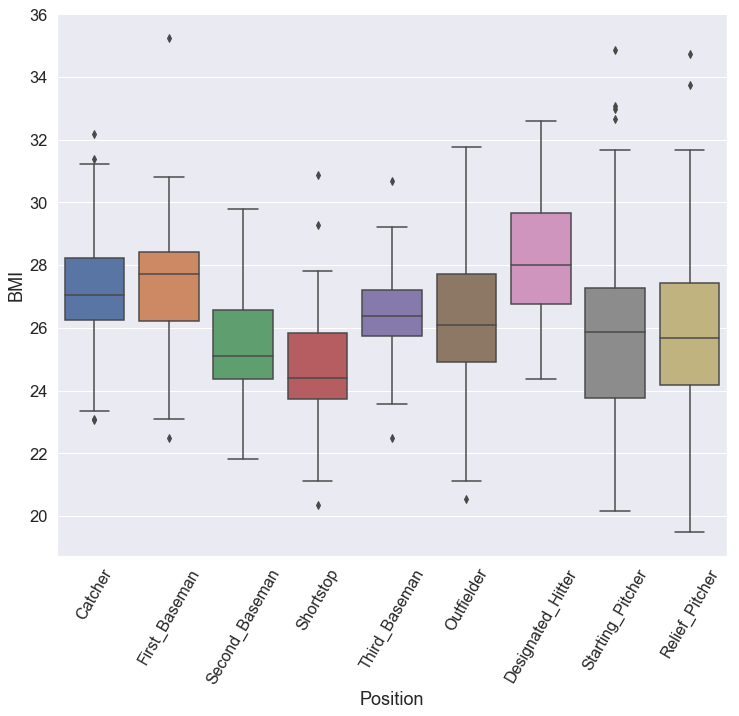

In [269]:
# Make boxplot of BMI by player's position
sns.boxplot(x=Position, y=BMI, data=df_baseball )
plt.xticks(rotation=60, size=16)
plt.ylabel("BMI")
plt.xlabel("Position")
#sns.plt.show()

Text(0.5, 0, 'Team')

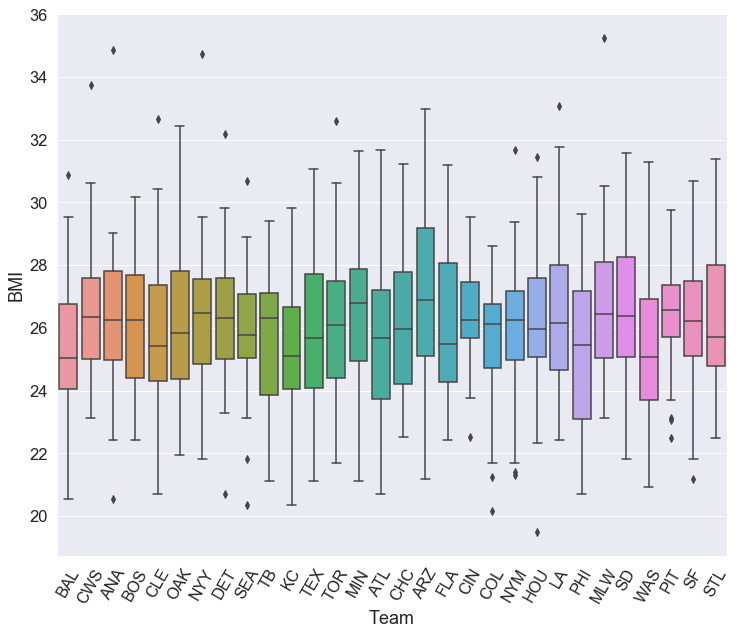

In [270]:
# Make boxplot of BMI by player's position
sns.boxplot(x=Team, y=BMI, data=df_baseball )
plt.xticks(rotation=60, size=16)
plt.ylabel("BMI")
plt.xlabel("Team")
#sns.plt.show()

# Standardizing BMI dimensionless

In [271]:
#using maximum and minimum
BMI_normalized=(BMI-BMI.min())/(BMI.max()-BMI.min())

In [272]:
#using the mean and standard deviation
BMI_standardized=(BMI-BMI.mean())/(BMI.std())

In [273]:
#overweight players(BMI greater than 25)
df_baseball['Name'][df_baseball['BMI']>25]


1                Paul_Bako
2          Ramon_Hernandez
3             Kevin_Millar
5            Brian_Roberts
6            Miguel_Tejada
7              Melvin_Mora
8              Aubrey_Huff
9               Adam_Stern
14         Corey_Patterson
15              Jay_Payton
16             Jay_Gibbons
19             Adam_Loewen
20          Daniel_Cabrera
22            Jaret_Wright
25            John_Parrish
26              Danys_Baez
28            Jamie_Walker
34          Jeremy_Guthrie
35         A.J._Pierzynski
36               Toby_Hall
37            Paul_Konerko
38         Tadahito_Iguchi
40            Alex_Cintron
41               Joe_Crede
42             Josh_Fields
44       Brian_N._Anderson
45            Luis_Terrero
46             Pablo_Ozuna
47         Scott_Podsednik
48            Jermaine_Dye
               ...        
990             Barry_Zito
991           Vinnie_Chulk
993            Steve_Kline
994        Armando_Benitez
995           Scott_Munter
996          Jack_Taschner
9

In [274]:
#players below 21 years old
df_baseball['Name'][df_baseball['Age']<21]

296    Felix_Hernandez
Name: Name, dtype: object

# Fitting Linear Regression

In [ ]:
#starting simple linear regression
#The regression equation explains height of the the player by weight. 
#First, see the correlation between height and weight using scatter plot

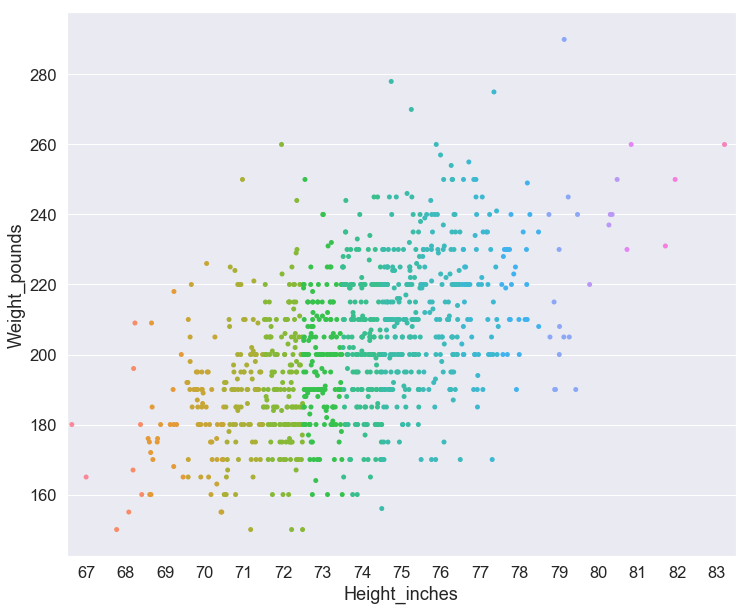

In [275]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1.5)
sns.stripplot(x="Height_inches", y="Weight_pounds",jitter=0.5, data=df_baseball)

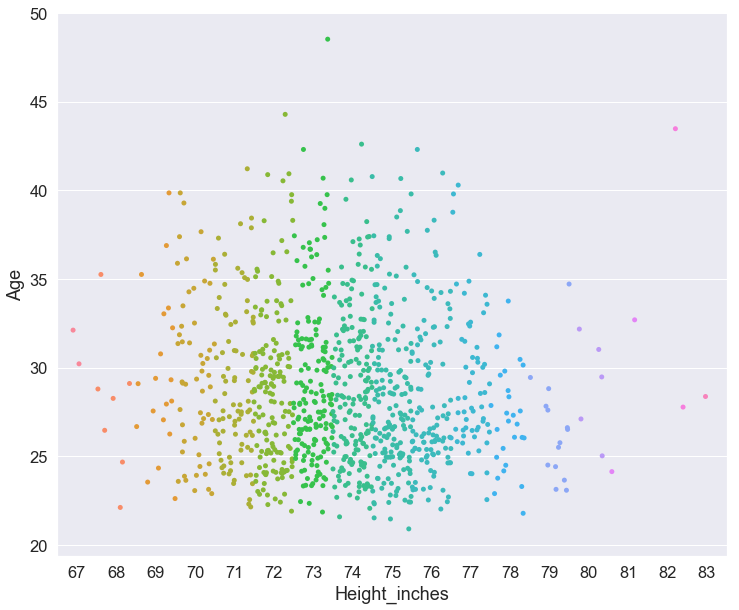

In [278]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1.5)
sns.stripplot(x="Height_inches", y="Age",jitter=0.5, data=df_baseball)

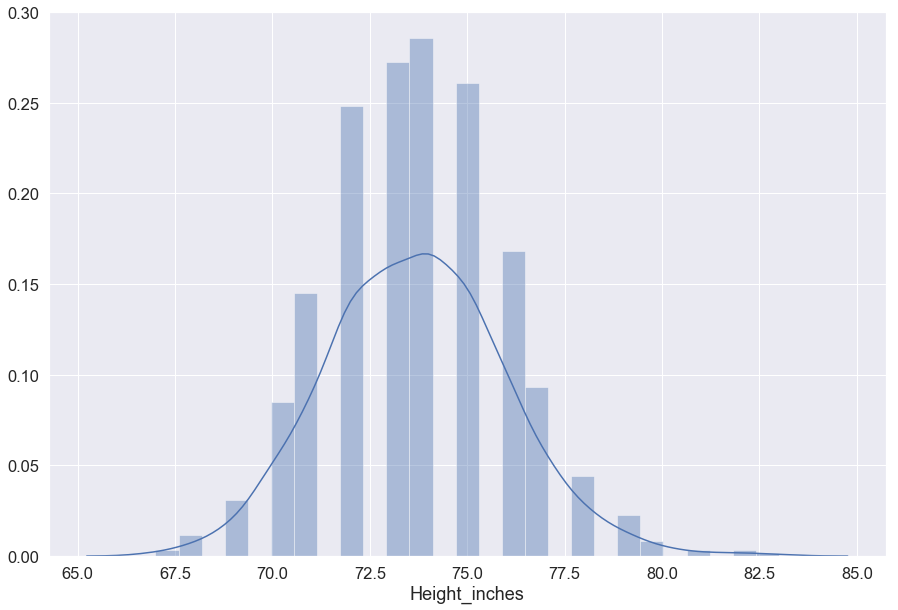

In [276]:
#Distribution curve for players height
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_baseball['Height_inches'])

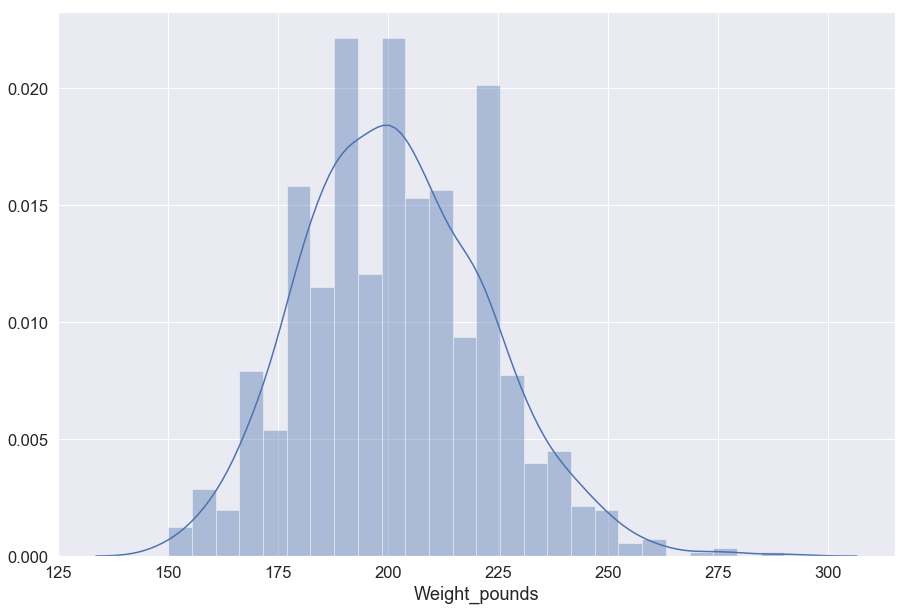

In [277]:
#Distribution curve for players weight
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_baseball['Weight_pounds'].dropna())

In [279]:
#creating a dataframe free from NaN
df_lm=pd.DataFrame(Height_inches,columns=['Height_inches'])
df_lm['Age']=Age
df_lm['Weight_pounds']=Weight_pounds
df_lm_all=df_lm.dropna()

In [284]:
#the NaN free dataframe
df_lm_all.head()

,Height_inches,Age,Weight_pounds
0,74,22.99,180.0
1,74,34.69,215.0
2,72,30.78,210.0
3,72,35.43,210.0
4,73,35.71,188.0


In [280]:
#standardizing height, weight, and age
Height_inches_standardized=(df_lm_all['Height_inches']-df_lm_all['Height_inches'].mean())/(df_lm_all['Height_inches'].std())
Age_standardized=(df_lm_all['Age']-df_lm_all['Age'].mean())/(df_lm_all['Age'].std())
Weight_pounds_standardized=(df_lm_all['Weight_pounds']-df_lm_all['Weight_pounds'].mean())/(df_lm_all['Weight_pounds'].std())

In [282]:
#Creating a dataframe of standardized features
df_lm_standardized=pd.DataFrame(Height_inches_standardized,columns=['Height_inches'])
df_lm_standardized['Age']=Age_standardized
df_lm_standardized['Weight_pounds']=Weight_pounds_standardized

In [283]:
#Head of the standardized dataframe
df_lm_standardized.head()

,Height_inches,Age,Weight_pounds
0,0.130539,-1.329767,-1.033240
1,0.130539,1.377127,0.634102
2,-0.736640,0.472515,0.395910
3,-0.736640,1.548332,0.395910
4,-0.303051,1.613112,-0.652134


In [285]:
#splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df_lm_standardized.iloc[:,0:2], df_lm_standardized.iloc[:,2], test_size=0.2, random_state=0)

In [286]:
#Fitting a lineaar regression model without constant
regressor = LinearRegression(fit_intercept=False)  
fit_1=regressor.fit(X_train, y_train) #training the algorithm


In [287]:
#For retrieving the coefficients:
#Interpret the result
print(fit_1.coef_)

[0.52705871 0.20041055]


In [243]:
#Finding predicted values for the training set
train_predicted=regressor.predict(X_train)

In [244]:
#The r square of the training set
#Interpret the result
np.round(metrics.r2_score(y_train,train_predicted),3)

0.298

In [245]:
# The predicted values for the test set
y_test_predicted=regressor.predict(X_test)

In [246]:
#The r square of the test set
#Interpret the result
np.round(metrics.r2_score(y_test,y_test_predicted),3)

0.416

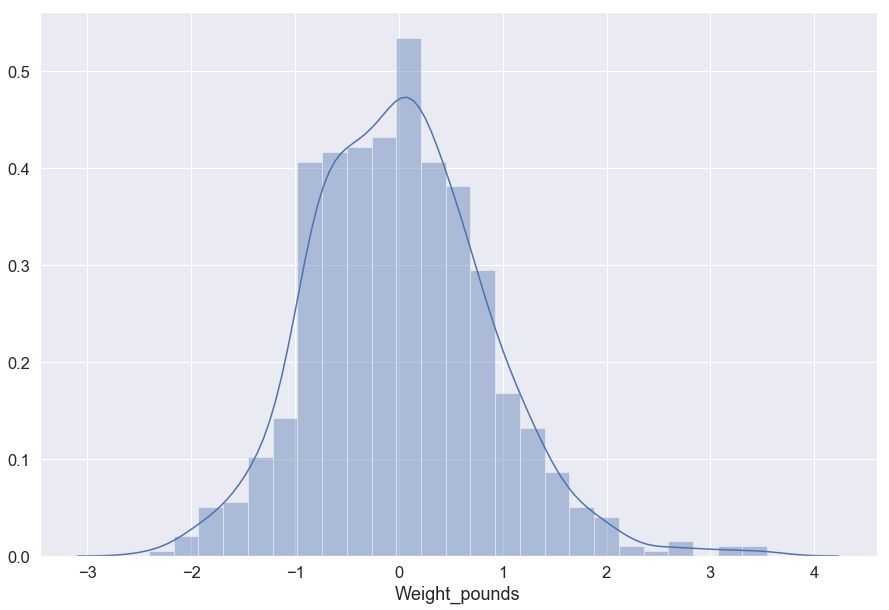

In [288]:
#Residual analysis
#calculating the residual
error=y_train-train_predicted
#Making histogram of residuals
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(error)

# Exercise

In [ ]:
#update the previous model by including intercept

In [ ]:
#Regress BMI on height and age and interpret the result 